# Task_#5_Vysotskiy_Roman_Group_J4132c

In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
# python -m pip install tensorflow-macos==2.10
# python -m pip install tensorflow-metal==0.60

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [21]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = r'Cats_and_Dogs/train'
val =   r'Cats_and_Dogs/val'
test =  r'Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = len(os.listdir(os.path.join(train, 'cats'))) + len(os.listdir(os.path.join(train, 'dogs')))
# validation set size 
nb_validation_samples = len(os.listdir(os.path.join(train, 'cats'))) + len(os.listdir(os.path.join(train, 'dogs')))
# test set size
nb_test_samples = len(os.listdir(os.path.join(train, 'cats'))) + len(os.listdir(os.path.join(train, 'dogs')))

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [32]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [23]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
#     +Relu
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
#     +ReLu
model.add(Dense(64, activation='relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
#     +Sigmoid
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
print(tf.__version__)
print((tf.config.list_physical_devices()))

2.11.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [31]:
# import tensorflow as tf
#
# cifar = tf.keras.datasets.cifar100
# (x_train, y_train), (x_test, y_test) = cifar.load_data()
# model = tf.keras.applications.ResNet50(
#     include_top=True,
#     weights=None,
#     input_shape=(32, 32, 3),
#     classes=100,)
#
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
# model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
# model.fit(x_train, y_train, epochs=5, batch_size=64)

In [25]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

model_history_1 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs= 10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/2840461118.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history_1 = model.fit_generator(


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
312/312 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.6360WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x141cd25f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the v

In [26]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/1141562015.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 83.00%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

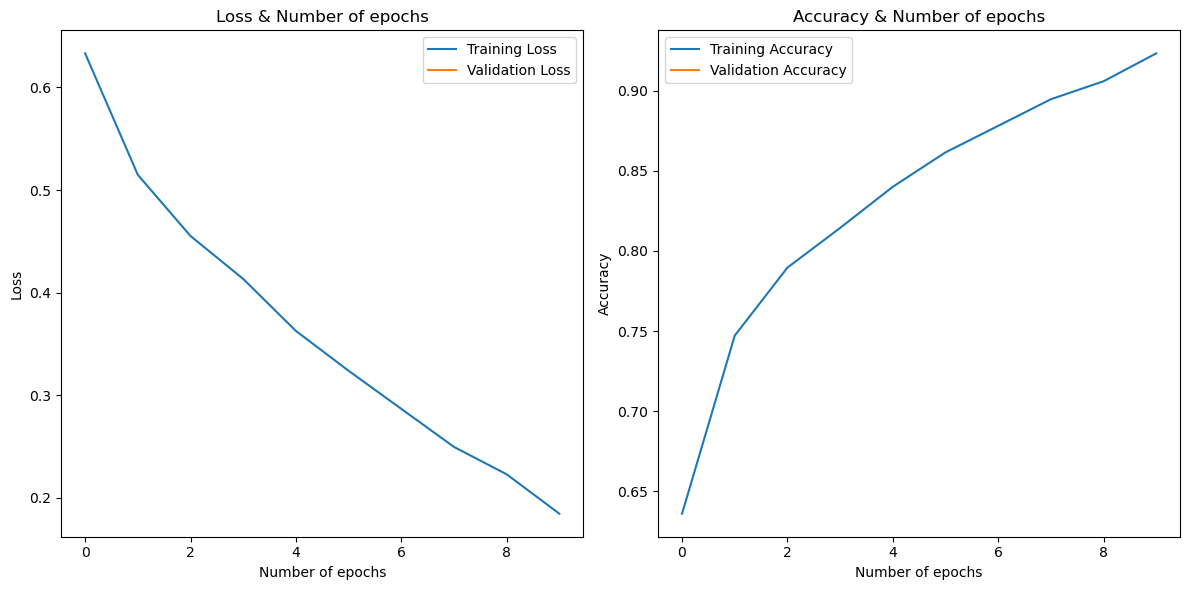

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history_1.history['loss'], label='Training Loss')
plt.plot(model_history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss & Number of epochs')

plt.subplot(1, 2, 2)
plt.plot(model_history_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy & Number of epochs')

plt.tight_layout()
plt.show()

In [30]:
model_history_1.history # it's strange that val_loss has only one value, maybe it is because of my silicon processor M1

{'loss': [0.633133590221405,
  0.5148093104362488,
  0.4552062153816223,
  0.413390189409256,
  0.36271533370018005,
  0.32390472292900085,
  0.2867952585220337,
  0.2497100830078125,
  0.22303235530853271,
  0.18464383482933044],
 'accuracy': [0.6360353231430054,
  0.7471910119056702,
  0.7896267771720886,
  0.8144060969352722,
  0.8400883078575134,
  0.8615570068359375,
  0.8781099319458008,
  0.8947131037712097,
  0.905949056148529,
  0.9233547449111938],
 'val_loss': [0.5776355862617493],
 'val_accuracy': [0.6851405501365662]}

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [33]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [34]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fully connected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

E.g., it was like:


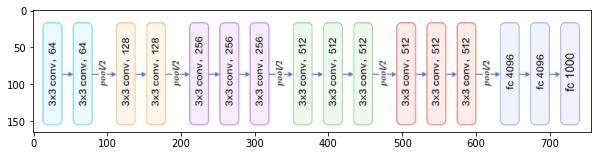

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

and it becomes:

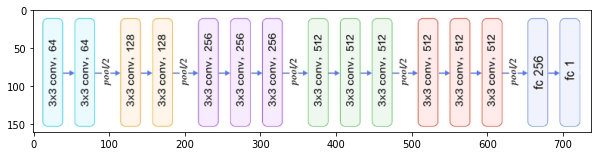

In [ ]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

In [37]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

vgg16_history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/1931293198.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16_history = model.fit_generator(


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
312/312 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.7331WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2845ed120> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

In [39]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/3175493160.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 89.36%


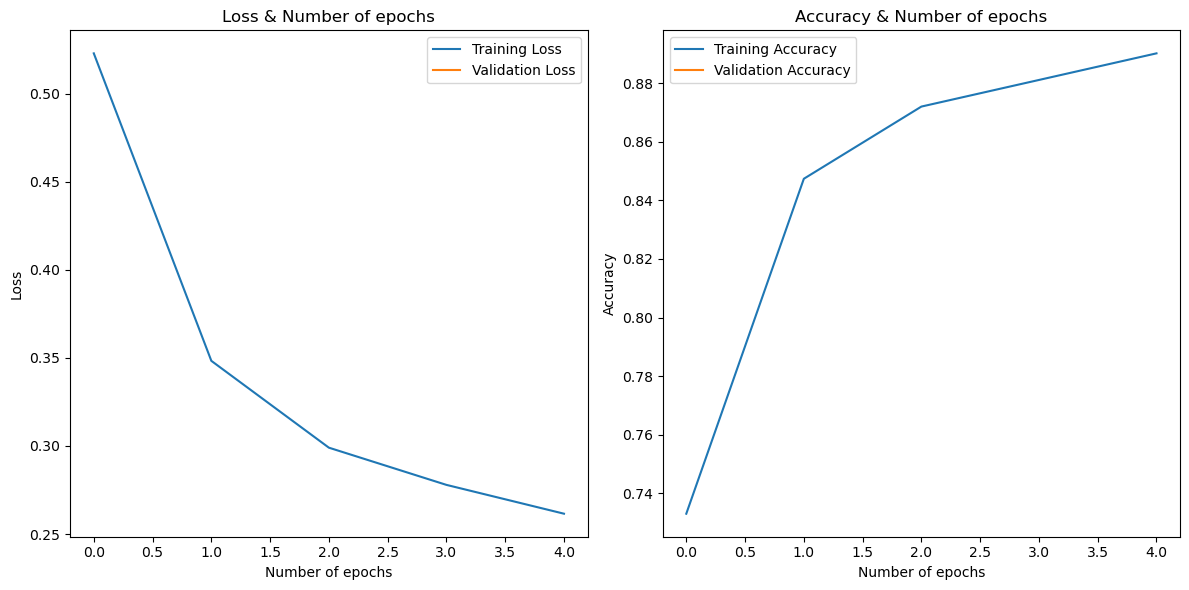

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(vgg16_history.history['loss'], label='Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss & Number of epochs')

plt.subplot(1, 2, 2)
plt.plot(vgg16_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy & Number of epochs')

plt.tight_layout()
plt.show()

## Pre-trained DL model (ResNet101V2)
#### I chose this model due to it quite low time of Time (ms) per inference step (CPU) ~ 70

In [41]:
from keras.applications import ResNet101V2

base = ResNet101V2(weights='imagenet',
                      include_top=False,
                      input_shape=(150, 150, 3))

base.trainable = False

# add layers to ResNet101V2:
resnet101v2_net = Sequential()
resnet101v2_net.add(base)
resnet101v2_net.add(Flatten())
resnet101v2_net.add(Dense(256, activation='relu'))
resnet101v2_net.add(Dropout(0.5))
resnet101v2_net.add(Dense(1, activation='sigmoid'))

171317808/171317808 [==============================] - 18s 0us/step


In [43]:
resnet101v2_net.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [44]:
resnet101v2_history = resnet101v2_net.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/538805282.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resnet101v2_history = resnet101v2_net.fit_generator(


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
312/312 [==============================] - ETA: 0s - loss: 0.2190 - accuracy: 0.9391WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x2ed56d1b0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

In [45]:
resnet101v2_scores = resnet101v2_net.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data using ResNet50: %.2f%%" % (resnet101v2_scores[1]*100))

/var/folders/_2/3r2pyzk16rdbwgbf6s6rlngr0000gn/T/ipykernel_18320/3933795415.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  resnet101v2_scores = resnet101v2_net.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data using ResNet50: 96.68%


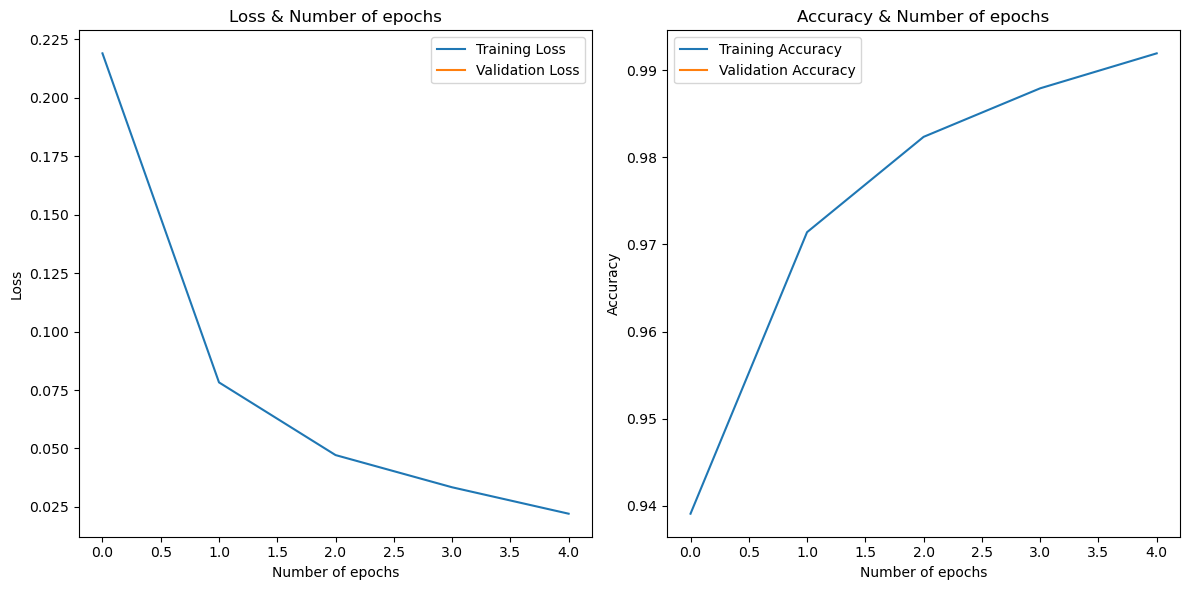

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(resnet101v2_history.history['loss'], label='Training Loss')
plt.plot(resnet101v2_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss & Number of epochs')

plt.subplot(1, 2, 2)
plt.plot(resnet101v2_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet101v2_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy & Number of epochs')

plt.tight_layout()
plt.show()

In [47]:
resnet101v2_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
resnet101v2_history.history

{'loss': [0.21904055774211884,
  0.07826149463653564,
  0.04716813936829567,
  0.033387962728738785,
  0.022083276882767677],
 'accuracy': [0.9391051530838013,
  0.971408486366272,
  0.9823434948921204,
  0.9879113435745239,
  0.9919241666793823],
 'val_loss': [0.10862503945827484],
 'val_accuracy': [0.9638554453849792]}

### still doesn't understand why only 1 value in 'val_loss' and 'val_accuracy'

# Let's check how 2 last models classify images

In [53]:
def image_classifier(model, img_path):
    from keras.utils import load_img, img_to_array
    import numpy as np

    img = load_img(img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    prediction = model.predict(x)
    if prediction[0][0] > 0.5:
        return "dog"
    else:
        return "cat"

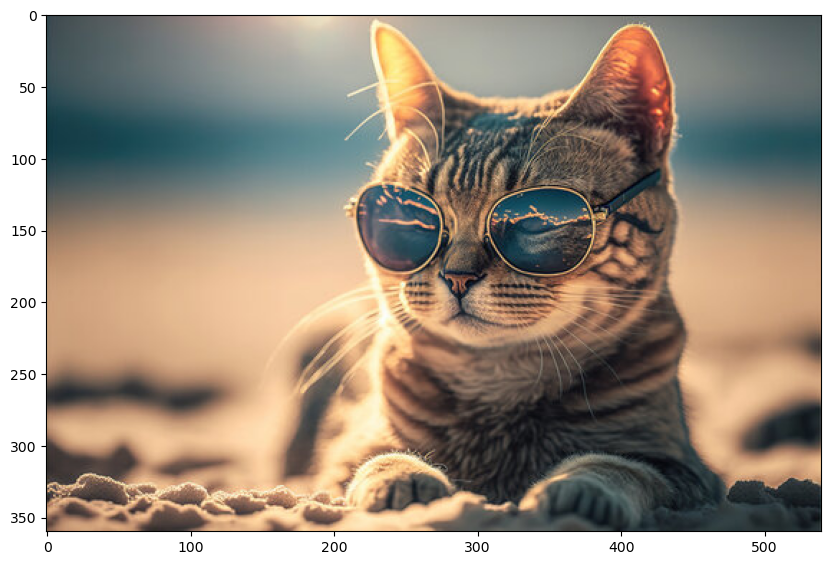

1/1 [==============================] - 0s 250ms/step
VGG16 classified image as a cat
ResNet101V2 classified image as a cat


In [56]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('cat_test.jpg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

img_path = r'cat_test.jpg'
print(f"VGG16 classified image as a {image_classifier(model, img_path)}\nResNet101V2 classified image as a {image_classifier(resnet101v2_net, img_path)}")

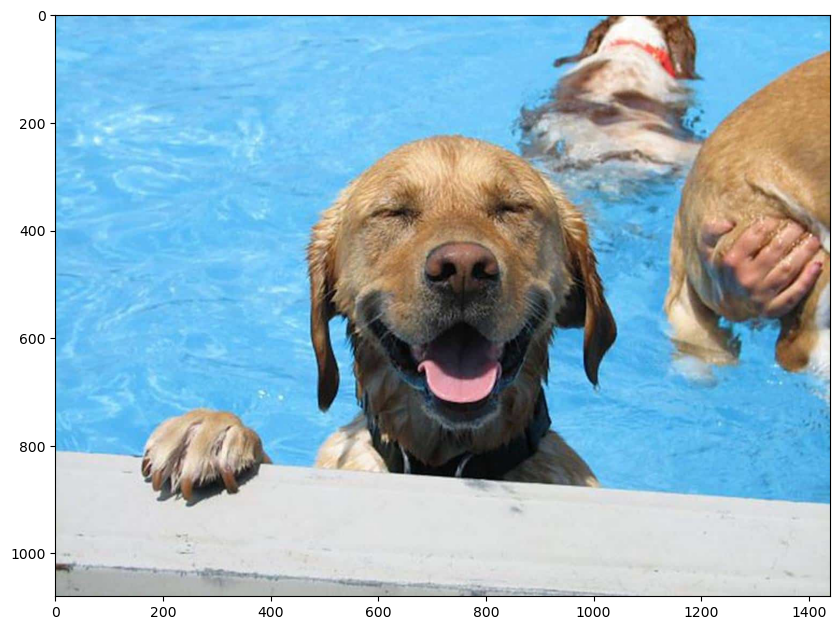

1/1 [==============================] - 1s 1s/step
VGG16 classified image as a dog
ResNet101V2 classified image as a dog


In [58]:
img = mpimg.imread('dog_test.jpg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

img_path = r'dog_test.jpg'
print(f"VGG16 classified image as a {image_classifier(model, img_path)}\nResNet101V2 classified image as a {image_classifier(resnet101v2_net, img_path)}")

### Both last 2 models classified two images correct. But we can compare them by accuracy on the test samples.
### So according to accuracy of test data the best on is ResNet101V2 with score 96,68%